KINTU DECLAN TREVOR - 100944330

Machine Learning Model using Decision Trees to analyse the Wisconsin Diagnostic Breast Cancer (WDBC) data set.

1) Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

2) Load Dataset

In [3]:
df = pd.read_csv("wdbc.data", sep=",")
df.describe()

,ID,radius,texture,parameter,area,smoothness,compactness,concavity,concave,symmetry,...,radius_bad,texture_bad,parameter_bad,area_bad,smoothness_bad,compactness_bad,concavity_bad,concave_bad,symmetry_bad,fractual_dimension_bad
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.head()

,ID,diagnosis,radius,texture,parameter,area,smoothness,compactness,concavity,concave,...,radius_bad,texture_bad,parameter_bad,area_bad,smoothness_bad,compactness_bad,concavity_bad,concave_bad,symmetry_bad,fractual_dimension_bad
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3) Explore Current Dataset

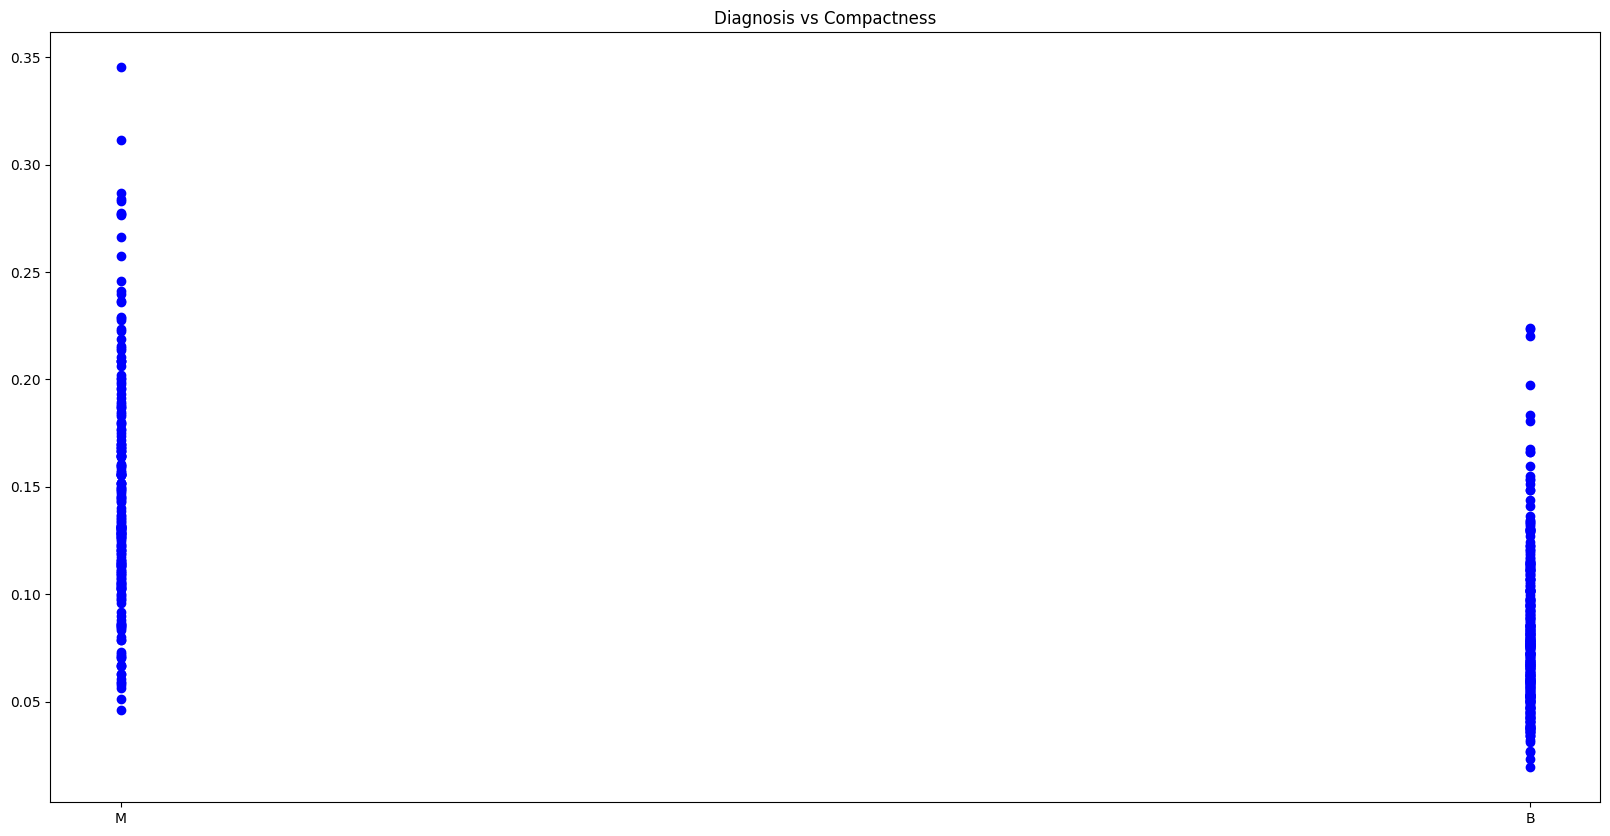

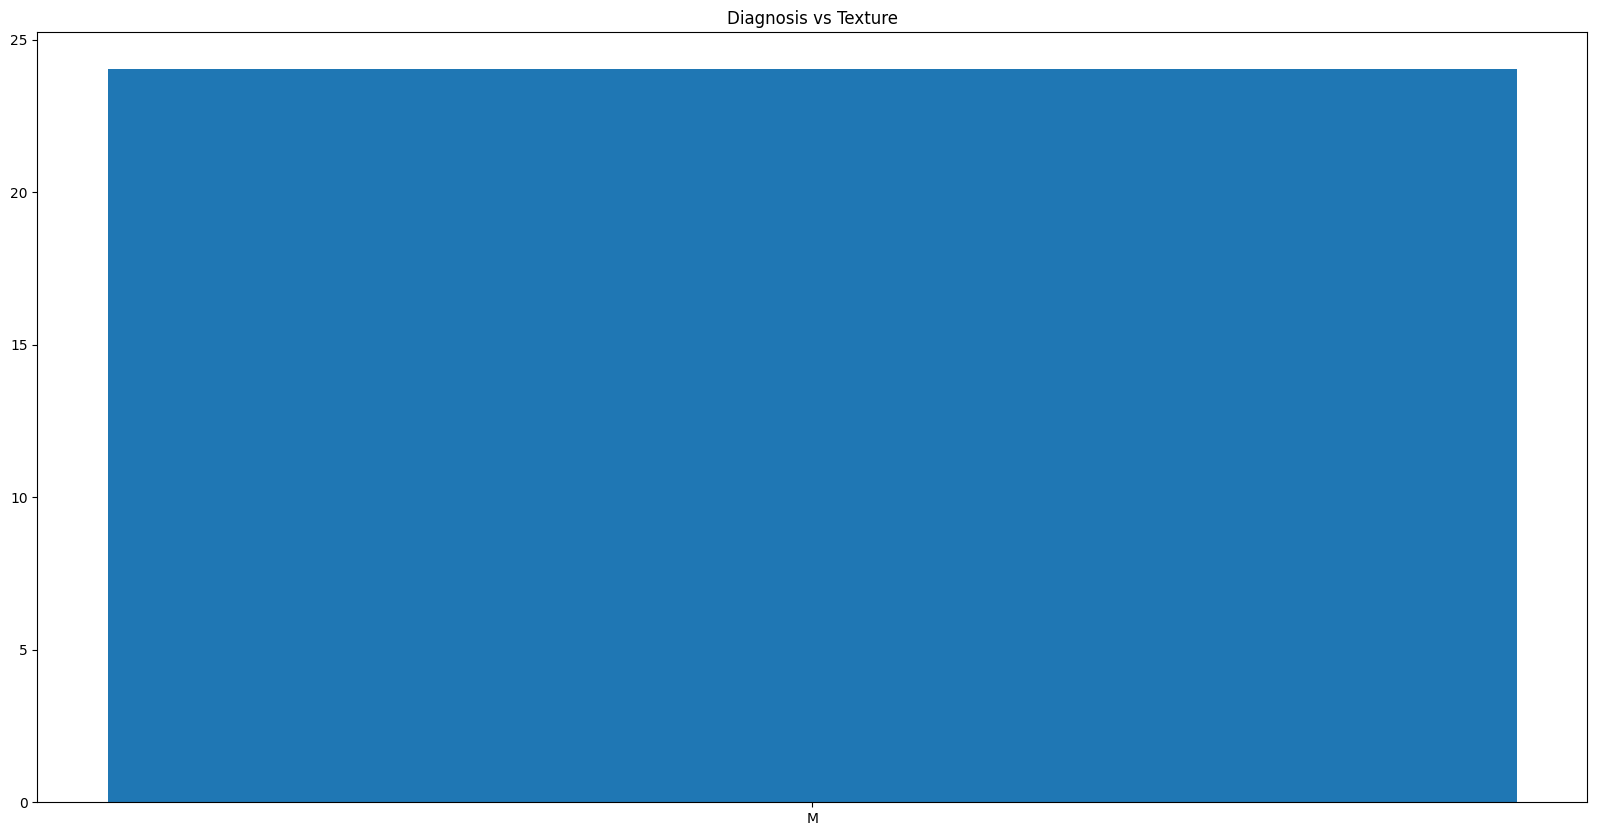

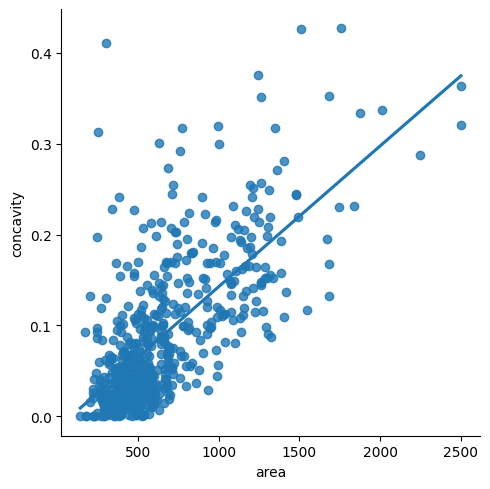

In [5]:
df = df.drop(columns="ID")
x2 = df['diagnosis']
y2 = df['compactness']
fig = plt.figure(figsize =(20, 10))
plt.scatter(x2, y2, c="blue")
plt.title('Diagnosis vs Compactness')
plt.show()

x1 = df['diagnosis']
y1 = df['texture']
fig = plt.figure(figsize =(20, 10))
plt.bar(x1[0:10], y1[0:10])
plt.title('Diagnosis vs Texture')
plt.show()

sns.lmplot(x ="area", y ="concavity", data = df, order = 2, ci = None)
plt.show()

4) Split the data and prepare it for training.

In [6]:
def splitdataset(df):
    X, Y = df.drop(columns="diagnosis"), df["diagnosis"]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test

5) Train Model using Gini Index

In [7]:
def train_using_gini(X_train, y_train):
	clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
	clf_gini.fit(X_train, y_train)
	return clf_gini

6) Train Model using Entropy

In [8]:
def train_using_entropy(X_train, y_train):
	clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
	clf_entropy.fit(X_train, y_train)
	return clf_entropy

7) Make Prediction and Evaluate Model

In [9]:
# Function to make predictions
def prediction(X_test, clf_object):
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
	print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
	print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
	print("Report : ", classification_report(y_test, y_pred))

8) Plot Decision Tree

In [10]:
def plot_decision_tree(clf_object, feature_names):
	plt.figure(figsize=(20, 10))
	plot_tree(clf_object, filled=True, feature_names=feature_names, rounded=True)
	plt.show()

9) Execute Model

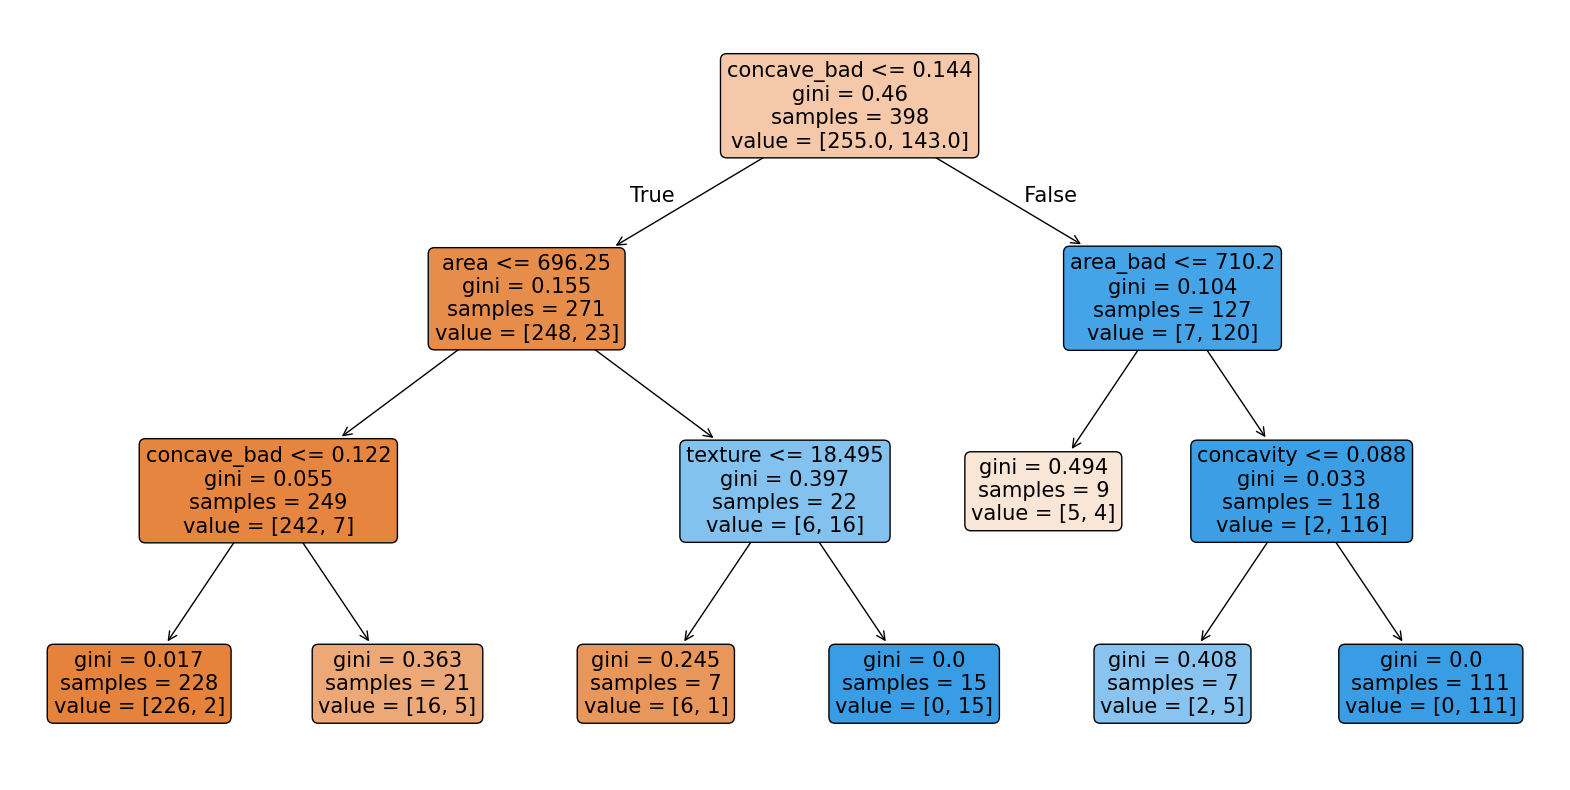

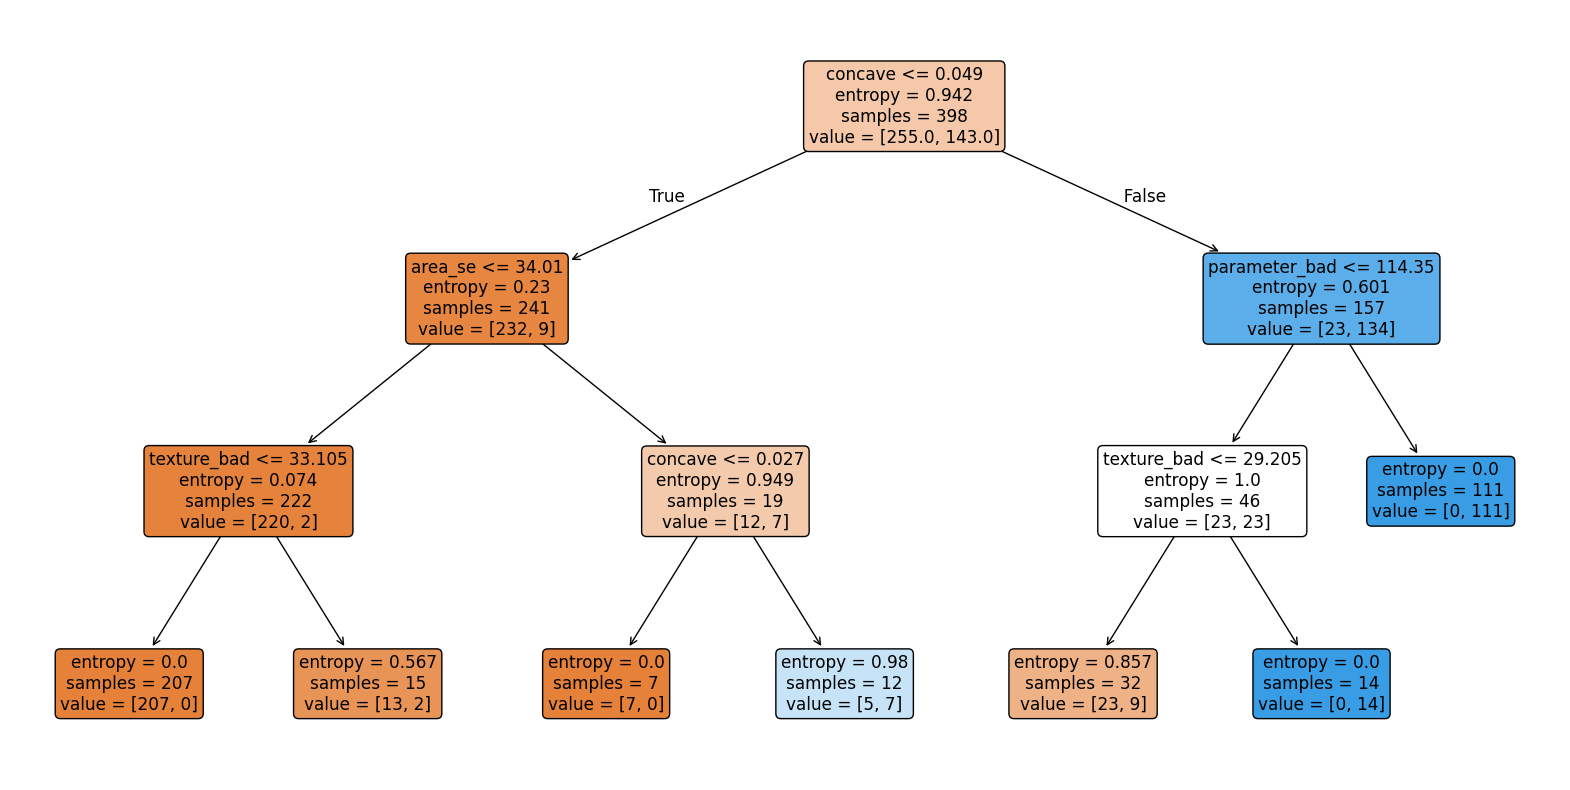

In [11]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(df)
 
clf_gini = train_using_gini(X_train, y_train)
clf_entropy = train_using_entropy(X_train, y_train)

# Visualizing the Decision Trees
plot_decision_tree(clf_gini, X_train.columns)
plot_decision_tree(clf_entropy, X_train.columns)

10) Evaluate Model Performance

In [12]:
#Evaluating Gini Index Model
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
['M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B']
Confusion Matrix:  [[100   2]
 [  7  62]]
Accuracy :  94.73684210526315
Report :                precision    recall  f1-score   support

           B       0.93      0.98      0.96       102
           M       0.97      0.90      0.93        69

    accuracy   

In [13]:
#Evaluating Entropy model
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
['M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B']
Confusion Matrix:  [[99  3]
 [11 58]]
Accuracy :  91.81286549707602
Report :                precision    recall  f1-score   support

           B       0.90      0.97      0.93       102
           M       0.95      0.84      0.89        69

    accuracy          